# Linear Regression
This is the practical session that is on predictive modelling using Linear Regression. You can find the slides [here](https://docs.google.com/presentation/d/16VhmU8YMTqHkUYXwOVapR88wFLRIIoHwqLQ6QhcD7LU/edit?usp=sharing).

"Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered an explanatory variable, and the other is considered a dependent variable. For example, a modeller might want to relate the weights of individuals to their heights using a linear regression model. " [1](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)

Linear Regression attempts to predict a continuous outcome feature (**Y**) from one or more explanatory features (**X**).  

$$Y = \beta_0 + \beta_1 X$$

$\beta_0$ is called the intercept term and represents the expected mean value of Y when all explanatory features equal 0.  
$\beta_1$ is called a beta coefficient and represents the expected change in the value of Y that results from a one-unit change in X.  

We will use a diabetes dataset that is part of the `sklearn.datasets` module

**What impacts diabetes disease progression?**

To ensure that our linear regressor is appropriate and interpretable, we will have to confirm the following assumptions are not violated:

1. Linear relationship between x and y - We can draw a line or curve within the relationship
2. Normality - A normal curve, a histogram of the values should look like a bell
3. Minimal multicollinearity (if multiple variables) - Each variable should introduce **new** information
4. No autocorrelation - No relationship **within** a variable depending on the time/magnitude scale
5. Homoscedasticity - The variation in the error of the model should not be increasing as the variation in the data increases

- Additional rule of thumb: at least 20 observations per independent variable in the analysis
  
If these assumptions are violated, then the predictive power of the linear regression is still valid but the information concerning the most important features is not. It is important to keep this in mind!

## Import packages
First, we need to import several packages. In Python, the most comprehensive machine learning library is SciKit-Learn. It provides many common machine learning algorithms as well as a large number of utility functions and tools.

Let's import SciKit-Learn, which is packaged as `sklearn`, and some dependencies. It is common to use a combination of SciKit-Learn, NumPy, Pandas, and SciPy for machine learning tasks.

In [13]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 996.6 kB/s eta 0:00:001m816.9 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.0 MB/s eta 0:00:002.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 16.5 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.9 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.4 MB/s eta 0:00:00 MB/s eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 10.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 19.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 15.7 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 27.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 11.1 MB/s eta 0:00:00m eta 0:00:01:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 27.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## About the installed packages

**pandas** - creating datasets in python(tool to wrangle dataframes)
**scikit-learn** - contains most of the datasets in python
**stats** - has models
**matplotlib** - for plotting
**seaborn**
**statsmodels**

## Importing libraries

In [4]:
import numpy as np
import pandas as pd
from scipy import stats as stats

# Plotting package
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns # seaborn is a data visualization library
#provides a high-level interface for drawing attractive and informative statistical graphics.
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

# We'll be using statsmodels to fit linear regression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor

from sklearn import datasets, linear_model
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.metrics import mean_squared_error

from sklearn import model_selection
%matplotlib inline

## Preparing Our Data

### Diabetes dataset
In this example, we will analyse a diabetes dataset that is part of the `sklearn.datasets` module:

In [5]:
# Loading the diabetes dataset
diabetes = datasets.load_diabetes()

Let's have a look at what we have:

In [6]:
#Viewing our diabetes dataset
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [7]:
# looking into the variables in the dataset
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
# look into the measures
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

The Data is an a NumPy array. Let us create a Pandas DataFrame version of the dataset, as several tools can work with DataFrames and these are often easier to work with than NumPy data structures:

In [9]:
# Converting the data into a dataframe
diabetes = datasets.load_diabetes()
diabetes_pd = pd.DataFrame(diabetes.data)
feature_names = ["age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"] #these features will be used for prediction
diabetes_pd.columns = feature_names
diabetes_pd["y"] = diabetes.target # adding an extra column named 'y'

Let's examine the top few rows of the data set: 

In [10]:
diabetes_pd.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


As you can see, the DataFrame does not contain any column names, so we currently have no indication as to what each colum represents. 

For more information, the data itself is described here:
<http://www4.stat.ncsu.edu/%7Eboos/var.select/diabetes.html> and the paper regarding the data's analysis can be found here <http://web.stanford.edu/%7Ehastie/Papers/LARS/LeastAngle_2002.pdf>

The paper itself describes a technique called Least Angle Regression (LARS), but in this case we will apply  linear regression with least squares error.

Notice also that the data is the `sklearn.datasets` packages has already been normalised.

From the links above we can find the column names (we will call them the *features*):

In [11]:
diabetes_pd

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


The variables are age, sex, body mass index, average blood pressure, and six blood serum values.

To give each column a name, we can access the DataFrame's `columns` member variable:

In [9]:
#diabetes_pd.columns = feature_names
#diabetes_pd["y"] = diabetes.target

In [10]:
diabetes_pd.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


You may notice that the `sex` feature contains strange data. We may first want to look at the column's unique values:

In [12]:
diabetes_pd.sex.unique()

array([ 0.05068012, -0.04464164])

You will notice that the sex of the patient is either `0.0506` or `-0.0446`, in other words either slightly negative or slightly positive. Because it is a categorical value we will drop this column for simplicity. Also we will add a `y` target column for the disease progression. The disease progression is a score that gives a numerical value to the extent at which diabetes has affected the patient. 

In [13]:
#diabetes_pd["y"] = diabetes.target

So we have added a new column called `y` that contains the disease progression, we can see how this looks by using `head` or `tail`:

In [14]:
diabetes_pd.tail()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


As an example, we will look to see if there is a correlation between BMI and disease progression. Later we will analyse the entire dataset. Using fewer features makes it easier to visualise and plot results, etc.

Here we take the `bmi` column and store it in a variable `X`:

In [15]:
X = diabetes_pd.bmi

We will then convert this to a NumPy array for use with SciKit-Learn later:

In [16]:
X = np.array(X)

In [17]:
X

array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
       -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
       -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
       -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
       -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
        0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
       -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
       -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
       -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
       -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
       -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
       -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
       -0.02452876, -0.01806189, -0.01482845, -0.02991782, -0.04

The target, or value we want to predict, will be stored in a variable `y`: 

In [18]:
y = diabetes_pd.y
y = np.array(y)

Finally, we will create restructure the data slightly to make it compatible with SciKit-Learn:

In [19]:
# Resize as they want in new versions of SciKit as per the warning
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

## Splitting Data into a Training Set and a Test Set

Now we have our data in to varibles, where `X` contains the data regarding each patient's BMI and `y` contains the data regarding each patient's disease activity score, we will split the data into what is known as a training set and a test set. 

The training set will be used by our linear regression algorithm to learn a model that predict's the disease progression. Once the model has been trained using the training data, we will use the test set to see how well the trained model fits to **new** data. This is the test set. In this simple example we will select $80$ samples from our total of $n=442$ samples in our test set. The remaining $442-80=362$ samples will be used to train our linear regression model.

### Train - Test split

Prior to building our model, we first need to split our dataset into a **training set** and a **test set**.  We will use our training set to train our regressor, and we will use our test set for model validation.
To achieve this, we will use call sklearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), and set the input parameter `test_size` to .2 so that 20% of the data will be assigned to the test set and 80% of the data will be assigned to the training set.

Spliting data manually, however, will lead to inequality. 

**We set the test set aside and only look at this at the end to evaluate the models performance on unseen data.**

*Why do we do this?* We do this in order to ensure that we do not test on what the model has already learned from. This way, we are not simply solving for the data we *know* about and we can check if our model is applicable when we do not know the output values. As a result, we can also check for **overfitting** the training data.

We fix the random state so that each time we run the train_test_split code, we get the same distribution of data. This is important as keeping the data split constant allows us to compare results from different runs. 

In [19]:
diabetes_pd

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [20]:
X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [21]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'y'
y = diabetes_pd[y_column]

# Define our independent variables
x_columns = ['bmi']
X = diabetes_pd[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['intercept'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [24]:
#check the length
len(diabetes_pd.bmi)

442

In [25]:
diabetes_pd.shape

(442, 11)

In [22]:
print("X_train contains %d samples and the y_train contains %d samples" % (len(X_train), len(y_train)))
print("X_test contains %d samples and the y_test contains %d samples" % (len(X_test), len(y_test)))

X_train contains 353 samples and the y_train contains 353 samples
X_test contains 89 samples and the y_test contains 89 samples


In [23]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

## Let's use the OLS (Ordinary Least Squares)

In [26]:
?sm.OLS

Init signature: sm.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
Docstring:     
Ordinary Least Squares

Parameters
----------
endog : array_like
    A 1-d endogenous response variable. The dependent variable.
exog : array_like
    A nobs x k array where `nobs` is the number of observations and `k`
    is the number of regressors. An intercept is not included by default
    and should be added by the user. See
    :func:`statsmodels.tools.add_constant`.
missing : str
    Available options are 'none', 'drop', and 'raise'. If 'none', no nan
    checking is done. If 'drop', any observations with nans are dropped.
    If 'raise', an error is raised. Default is 'none'.
hasconst : None or bool
    Indicates whether the RHS includes a user-supplied constant. If True,
    a constant is not checked for and k_constant is set to 1 and all
    result statistics are calculated as if a constant is present. If
    False, a constant is not checked for and k_constant is set to 0.
**kwa

In [28]:
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     194.5
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.78e-35
Time:                        15:53:02   Log-Likelihood:                -1958.9
No. Observations:                 353   AIC:                             3922.
Df Residuals:                     351   BIC:                             3930.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bmi          967.0123     69.344     13.945      0.0

For an explanantion of the results in the above, see [this awesome resource](http://connor-johnson.com/2014/02/18/linear-regression-with-python/). 

The R-squared is not that great! Let's see what we can do by using all the features. 

In [29]:
y_pred_test = model_fit.predict(X_test)

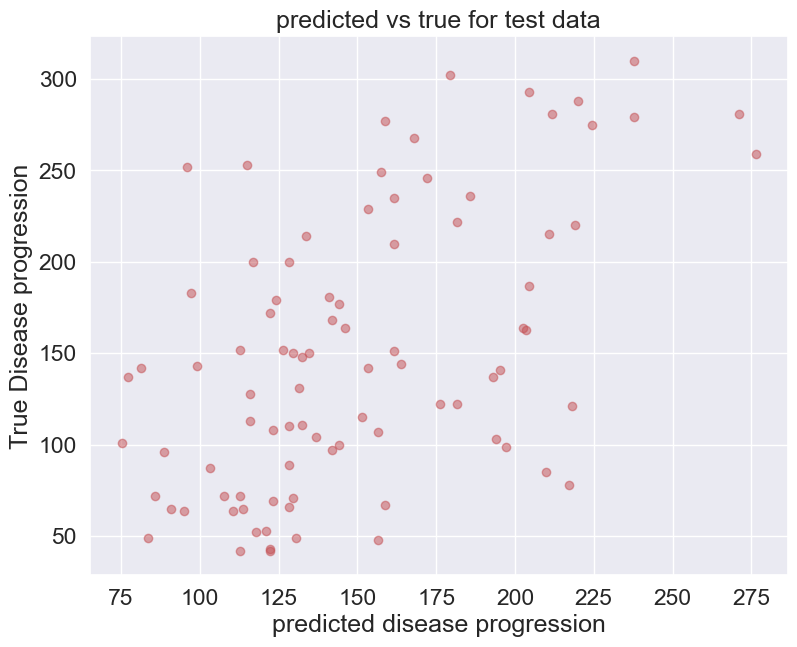

In [30]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted disease progression')
plt.ylabel('True Disease progression')
axes = plt.gca()
#axes.set_xlim([0,11000])
#axes.set_ylim([0,10000])
plt.show();
plt.savefig('scatter.png')

## Training a Linear Regression Model using scikit-learn

We begin by using the `LinearRegression` class of SciKit-Learn and create an instance of this class:

In [31]:
# Define our dependent variable
y_column = 'y'
y = diabetes_pd[y_column]

# Define our independent variables
x_columns = ['ltg']
X = diabetes_pd[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['intercept'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
linear_reg = linear_model.LinearRegression()

Now we fit the model according to the data in the training set. This is a **supervised** algorithm, so the linear model is fitting according to the data contained in `X` and minimising the loss according to `y`: 

In [33]:
linear_reg.fit(X_train, y_train)

LinearRegression()

That's it! The model has been fit, and we should now evaluate it on the test set. This will check how well the model fits to new, unseen data. Remember, the model was fit on the training set alone. It has never seen the data contained in `X_test` or the target data contained in `y_test`.

In [34]:
linear_reg.score(X_test, y_test)

0.38269153958537394

In [35]:
np.mean((linear_reg.predict(X_test) - y_test) ** 2)

np.float64(3270.593898919842)

Same here when using SciKit-Learn, the score is low, as confirmed also by the plat below. 

## Plotting the Results

We can plot the data in the test set, that is plot the BMI against the disease progression, and then plot the line that the Linear Regression model calculated as being the optimal line through the test data (based on the model learned on the training data): 

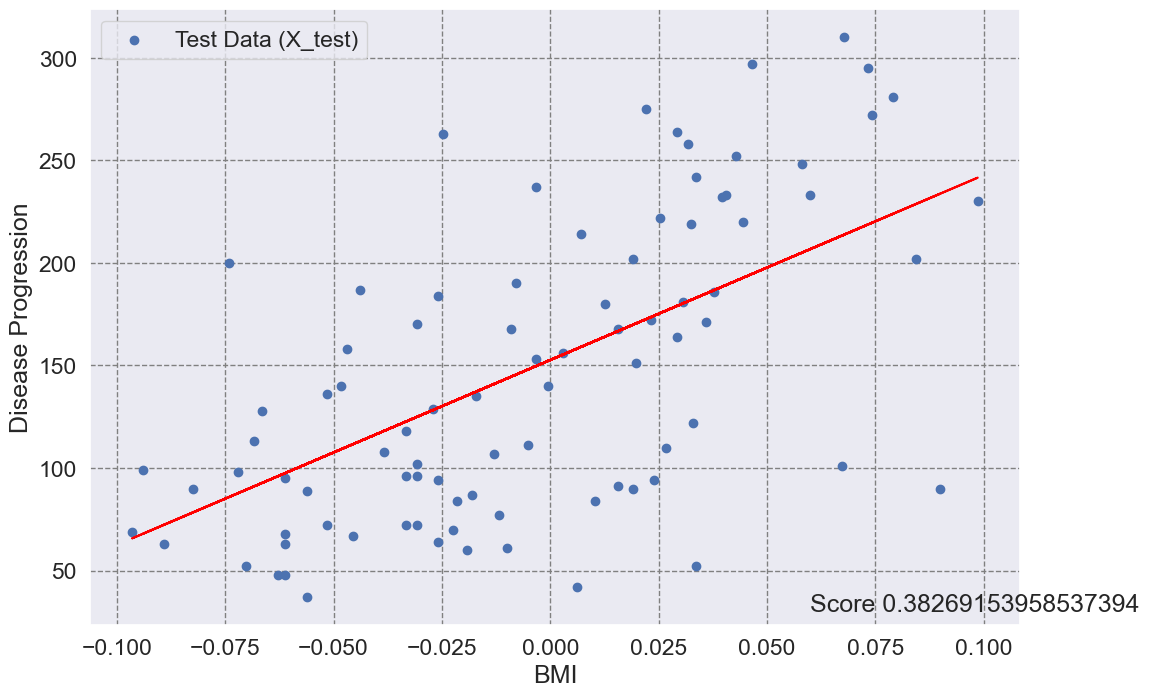

In [36]:
plt.scatter(X_test, y_test, label="Test Data (X_test)")
plt.plot(X_test, linear_reg.predict(X_test), color="red")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.text(0.06, 30, "Score " + str(linear_reg.score(X_test, y_test)))
plt.grid(color="gray", linestyle='--')
plt.legend()
plt.show();

## Higher-Dimensional Data

You will remember that in the analysis above, we extracted only one feature from the dataset (BMI) and tried to fit a model that would predict the disease progression based on the value of the BMI. We extracted one feature as this makes it easier to plot results. However, generally you would not want to throw away most of your features when working on a dataset. 

In this example we will use all the features of the dataset, and see how to plot the results even if we have higher dimensional data.

First, let's prepare the data for input into SciKit-Learn:

In [34]:
diabetes_pd

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [37]:
diabetes_pd['y'] = diabetes.target
X = diabetes_pd
y = diabetes_pd.y
# Remove the "target variable from the training data.
del X["y"]
#del X["sex"]
#X = np.array(X)
#y = np.array(y)

In [42]:
X

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


**Where the exercise begins**

Create a training set and a test set. We will see later why you would shuffle this data and not simply slice a percentage of the data to create train/test splits:

In [54]:
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.136
Model:                            OLS   Adj. R-squared (uncentered):              0.110
Method:                 Least Squares   F-statistic:                              5.378
Date:                Tue, 09 Jul 2024   Prob (F-statistic):                    2.13e-07
Time:                        16:55:04   Log-Likelihood:                         -2293.0
No. Observations:                 353   AIC:                                      4606.
Df Residuals:                     343   BIC:                                      4645.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Train a linear regression model on this data, using all features (10 in total):

In [56]:
#getting the model(Linear regression)
#linear_reg_all is a variable storing the model considering all the features
linear_reg_all = linear_model.LinearRegression()

In [60]:
# fitting the model
linear_reg_all.fit(X_train, y_train)

LinearRegression()

In [62]:
# checking how good the model is - getting the loss function
# the closer the loss function is to zero the better
linear_reg_all.score(X_test, y_test)

0.45260276297191937

Once we have trained a model using the training data in `X_train`, we can test it on some unseen data, in this case stored in `X_test`: 

In [63]:
np.mean((linear_reg_all.predict(X_test) - y_test) ** 2)

np.float64(2900.193628493482)

### Plotting the Results

When you wish to plot the results of a higher dimensional dataset's results, we can plot the measure outcome, stored in `y` against the predicted outcome, i.e. the output of `linear_reg_all.predict(y)` for each $y_i$ in y.

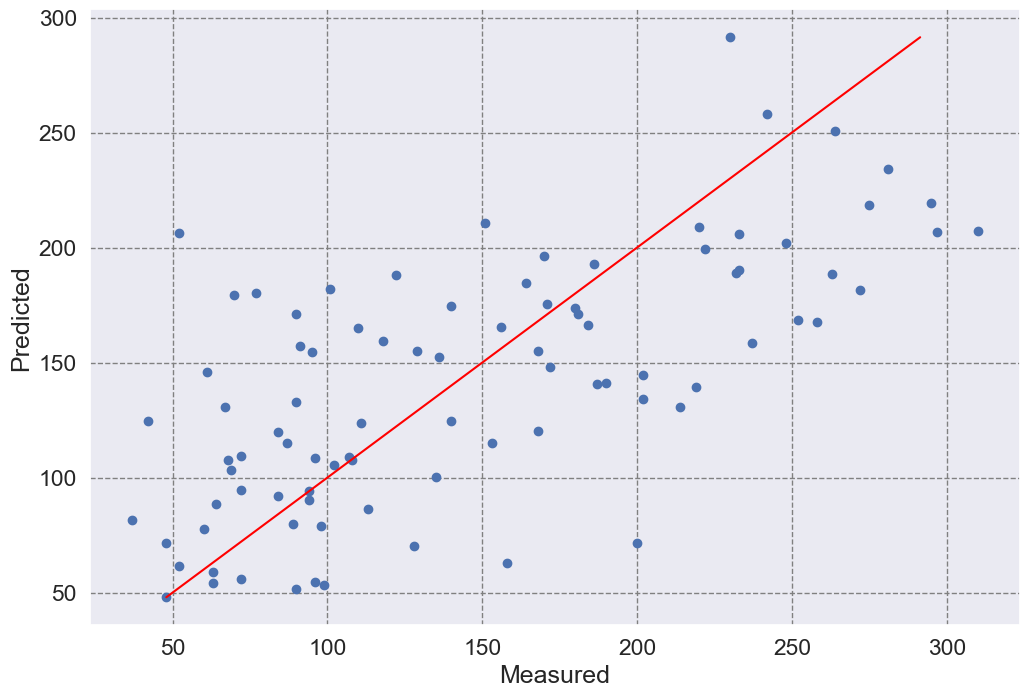

In [64]:
plt.scatter(y_test, linear_reg_all.predict(X_test))
plt.plot([linear_reg_all.predict(X_test).min(), linear_reg_all.predict(X_test).max()], [linear_reg_all.predict(X_test).min(), linear_reg_all.predict(X_test).max()], c='red')
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.grid(color="gray", linestyle='--')
plt.show();

In the above plot, and from the score we obtained, we can see that we have a better predictor when we use all  the features. 

But, we need to check if the data meet the requirement for using Linear Regression. 

## Check Assumptions

1. Linear relationship between x and y - We can draw a line or curve within the relationship
2. Normality - A normal curve, a histogram of the values should look like a bell
3. Minimal multicollinearity (if multiple variables) - Each variable should introduce **new** information
4. No autocorrelation - No relationship **within** a variable depending on the time/magnitude scale
5. Homoscedasticity - The variation in the error of the model should not be increasing as the variation in the data increases

- Additional rule of thumb: at least 20 observations per independent variable in the analysis

### Linearity
First, as the name implies, linear regression requires the underlying relationship between the independent (x) and dependent (y) variables to be linear. This means that a line drawn through the points can capture the relationship, with some degree of error. 

We must also be aware of outliers, which can throw off a linear relationship. 

The most straightforward check of linearity is to make scatter plots of the variables chosen.

In [65]:
model = sm.OLS(endog=y_train, exog=X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.136
Model:                            OLS   Adj. R-squared (uncentered):              0.110
Method:                 Least Squares   F-statistic:                              5.378
Date:                Tue, 09 Jul 2024   Prob (F-statistic):                    2.13e-07
Time:                        16:57:54   Log-Likelihood:                         -2293.0
No. Observations:                 353   AIC:                                      4606.
Df Residuals:                     343   BIC:                                      4645.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

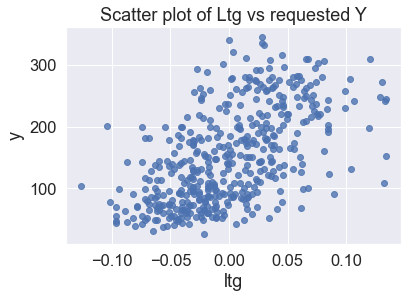

In [41]:
diabetes_pd["y"] = diabetes.target
ax = sns.regplot(x=x_columns[0], y=y_column, data=diabetes_pd, fit_reg=False);
ax.set_title(f'Scatter plot of {x_columns[0].replace("_", " ").title()} vs requested {y_column.replace("_", " ").title()}');

We can observer some level of linearity, and there are no outliers. 

-----
Normality
-----

Normality means the distribution of values falls into a normal distribution. 

The results summary printed above gives us an indication of whether or not our data is normally distributed. If the **Prob(JB)** number is less than 0.05, this means that we can reject the Null hypothesis that the data distribution is normal. If this is the case, we need to look into our model more closely see where this is coming from and how/if we can rectify the issue.

In our case, we can see that the that score is normal, as also shown in the skewness score, within -0.5 and 0.5. 

We can visualize the normality of the data by making histograms or Q-Q (quantile-quantile) plots.

First we will look at a histogram for the dependent variable, disease progression. 

/Users/caleb/opt/miniconda3/envs/malaria/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


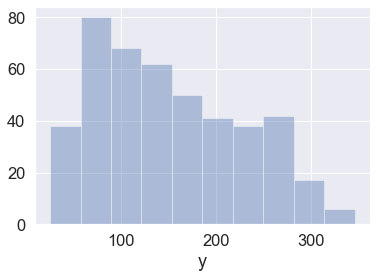

In [42]:
sns.distplot(diabetes_pd[y_column], kde=False, norm_hist=False);

In [43]:
print(f"{stats.skew(diabetes_pd[y_column], axis=None):.4}")

0.4391


### Multicollinearity

Multicollinearity is only applicable to multivariate regression, and means that two or more explanatory features are highly correlated. Think of these features as contributing the same information to the model, we aren't learning anything new having both of them versus only having one of them!

This makes it difficult for the model to try to differentiate between each feature's influence on the explanatory feature.

Again, the summary table from the linear regression can help us again. There is a statistic in the bottom right hand corner known as the **condition number**. This indicates the severity and impact of multicolinearity in the regression and as a rule fo thumb, values over 30 are an issue. 

One way to check this is by examining the correlation matrix and making sure none of the variables correlate to 1. Numpy's Corrcoef function returns a matrix of Pearson correlation coefficients. 

Read more about Numpy's Corrcoef [here](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.corrcoef.html).

In [44]:
df_corr_tbl = diabetes_pd[diabetes_pd.columns]
df_corr_tbl.corr()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
map,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
tc,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
ldl,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
hdl,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
tch,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
ltg,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
glu,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


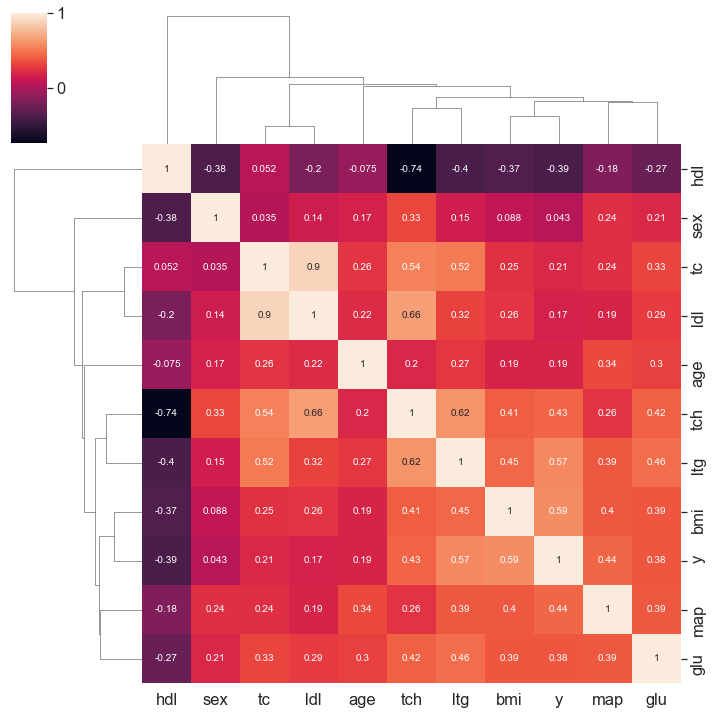

In [45]:
sns.clustermap(df_corr_tbl.corr(), annot=True)

<AxesSubplot:>

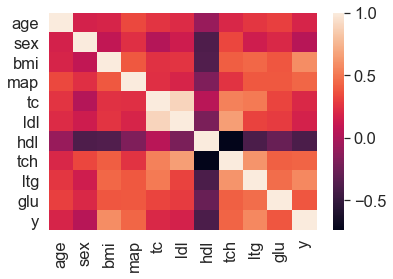

In [46]:
sns.heatmap(df_corr_tbl.corr())

### No autocorrelation

A variable has autocorrelation when values in the series correlate with others in the same series, separated by a given interval.

In terms of the residuals, this means checking that residuals are independent.

A check for this is the **Durbin-Watson test**. The durbin-watson statistic ranges from 0 to 4 with values around 2 suggesting no autocorrelation. Values < 2 suggest positive correlation and values > 2 suggest negative correlation.

In the summary table above, the Durbin-Watson test has a value of approximately 0.220, which means we have a positive correlation. 

### Homoscedasticity

Homoscedasticity is a statistical term that means that the spread of the residuals are equal across the regression line. This assumption means that the variance around the regression line is the same for all values of the predictor variable (X). 

Again, the summary table from the linear regression allows us to evaluate whether the model has homoscedasticity. If **Prob(Omnibus)** number is less than 0.05 we can reject the Null Hypothesis that the residuals are distributed uniformly and normally around zero.             0.373

In the case above, the Prob(Omnibus) is 0.373 which indicates that the model has homoscedasticity.

### In summary:

1. Linear relationship between x and y
      - We can observer some level of linearity, and there are no outliers. 
1. Minimal multicollinearity 
      - There is multicollinearity between funded_amount and some other predictors, so we should keep that in mind when we     perform a multivariate regression.
1. No autocorrelation
      - Durbin-Watson test indicates some autocorrelation
1. Homoscedasticity 
      -  Model is homoscedastic
  
From all these, and from the score we got, we can state that Linear Regression may not be the best fit for the data

## Credits

1. [A Tutorial on Machine Learningand Data Science Tools with Python](https://github.com/mdbloice/MLDS/blob/master/LinearRegression.ipynb)
2. [Machine learning for Good](https://github.com/DeltaAnalytics/machine_learning_for_good)

# Introduction to Regularization

In the context of regression, regularization refers to techniques to constrain/shrink the coefficient estimates towards zero.  
Shrinking the coefficients can 1) improve the fit of the model and 2) reduce the variance of the coefficients.

Two common types of regularization are ridge and lasso.  

Least squares linear regression minimizes the residual sum of squares (RSS).  In other words, it minimizes

$ RSS = \displaystyle \sum^{n}_{i=1} (y_i - \beta_0 - \sum^{p}_{j=1} \beta_j x_{ij})^2 $

In ridge and lasso, we add a term to the value we are trying to minimize.  

In ridge, we minimize 

$ RSS + \lambda \displaystyle \sum^{p}_{j=1} \beta_j^2 $


**Intuition:** We want to minmize our coefficients so we are not multiplying by huge values, hence the **square** term. **Ridge dislikes ridiculously large values** but it is okay with medium values.

In lasso, we minimize

$ RSS + \lambda \displaystyle \sum^{p}_{j=1} |\beta_j| $

**Intuition:** We want to remove and minimize the coefficients for features/variables that are not informative to our predictions. This form of regularization performs "automatic" feature selection. **LASSO rings in important features** and drives other coefficients to zero.

The $\lambda$ (pronounced "lambda") in the above values is a hyper-parameter which determines how 'strong' the regularization effect is.  Note: sometimes $\alpha$ (pronounced "alpha") is used instead of $\lambda$.

A useful way to use ridge or lasso regression is to run the regression over a range of alphas and see which features maintain a large beta coefficient for the longest. It is these features which have the most predictive power!

More in depth information can be found here: [Regularization Regression](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

### Some useful Functions

In [47]:
def prepare_train_data(train_df, pred_var):
    """
    Given a dataframe and the predictive variable, this
    function returns train and test arrays generated using  the  
    scikit--learn split function
    """
    rf_trainRes = train_df[pred_var]
    train_df = train_df.drop(pred_var, axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(train_df, rf_trainRes, test_size=0.2, random_state=42)
    
    train_df[pred_var] = rf_trainRes

    return X_train, X_test, y_train, y_test

def train_linear(X, y):
    linear_reg_all = linear_model.LinearRegression()
    linear_reg_all.fit(X_train, y_train)
    print(linear_reg_all.score(X_test, y_test))
    return linear_reg_all

def print_scores(regressor, X_train, y_train, X_test, y_test, oob_score=True):
    print("Train score: " + str(regressor.score(X_train, y_train)))
    print("Test score: " + str(regressor.score(X_test, y_test)))
    if oob_score:
        print("OOB score: " + str(regressor.oob_score_))
        
def train_linear_r(X_train, y_train, X_test, y_test):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    model1 = regr.fit(X_train, y_train)
    
    print_scores(model1, X_train, y_train, X_test, y_test, oob_score=False)
    plot_test(model1, X_train, y_train, 'train')
    plot_test(model1, X_test, y_test, 'test')
    
def plot_test(regressor, X_test, y_test, data):
    rf_y_predicted_test = regressor.predict(X_test)
    print("Mean squared error: %d " % round(mean_squared_error(y_test, rf_y_predicted_test)))
    fig = plt.figure(figsize=(7, 7))
    plt.scatter(y_test, rf_y_predicted_test, alpha=0.5)
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.title("Relationship between True Y and predicted Y* (%s dataset)" % data)
    plt.show()
    
def prepare_train_data(train_df, pred_var):
    """
    Given a dataframe and the predictive variable, this
    function returns train and test arrays generated using  the  
    scikit--learn split function
    """
    rf_trainRes = train_df[pred_var]
    train_df = train_df.drop(pred_var, axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(train_df, rf_trainRes, test_size=0.2, random_state=42)
    
    train_df[pred_var] = rf_trainRes

    return X_train, X_test, y_train, y_test

In [48]:
#pip install lofo-importance

In [49]:
X_train, X_test, y_train, y_test = prepare_train_data(diabetes_pd, 'y')

In [50]:
from sklearn.linear_model import Lasso

In [51]:
alphas = np.arange(0.001, 0.500, 0.002)
lasso_coefs = []
X_train_lasso= X_train[X_train.columns.tolist()] # Select columns / features for model

for a in alphas:
    lassoreg = Lasso(alpha=a, copy_X=True, normalize=True)
    lassoreg.fit(X_train_lasso, y_train)
    lasso_coefs.append(lassoreg.coef_)

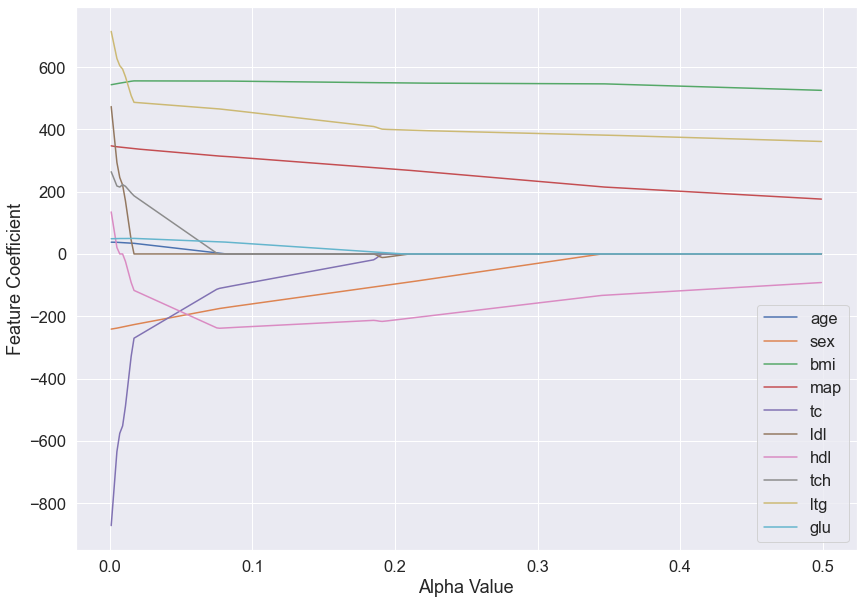

In [52]:
lasso_coefs = np.asarray(lasso_coefs).T

plt.figure(figsize=(14,10))
for coefs, feature in zip(lasso_coefs, X_train_lasso.columns):
    plt.plot(alphas, coefs, label = feature);
plt.ylabel('Feature Coefficient');
plt.xlabel('Alpha Value');
plt.legend(loc='best');
plt.show();

The features that tend towards Zero are not that useful. Let us remove them and see what happens. 

In [53]:
use_cols = diabetes_pd[['sex', 'bmi', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(use_cols, y, test_size=0.2, random_state=42)

Train score: 0.4925248212238953
Test score: 0.46347602518166886
Mean squared error: 3084 


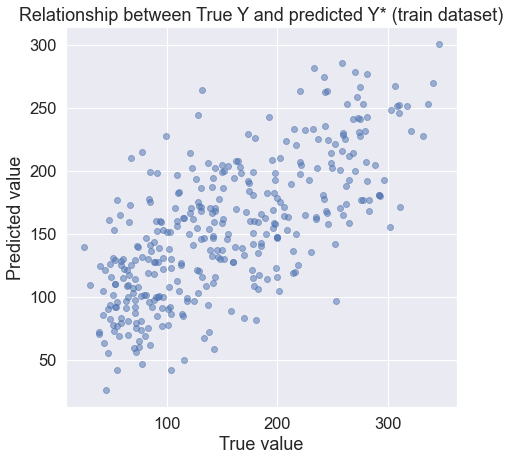

Mean squared error: 2843 


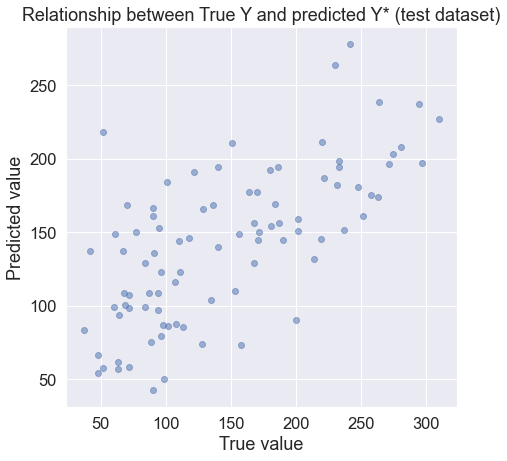

In [55]:
train_linear_r(X_train, y_train, X_test, y_test)

### Assignment: Can you figure out a way to choose the hyperparameters

In [63]:
## A Crude approach of Understanding Feature Importance